In [2]:
#Building a logistic regression model for predicting if a user will click or not in a certain ad
#Construindo um modelo utilizando regressão logística para dizer se um usuário vai clicar ou não em um anúncio

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [7]:
ad = pd.read_csv('Data/advertising.csv')

In [8]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# EXPLORATORY DATA ANALYSIS
Exploring the data and its characteristics using the seaborn library

Throughout this exploration, new information about the dataset will be revealed

In [11]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Age', ylabel='Count'>

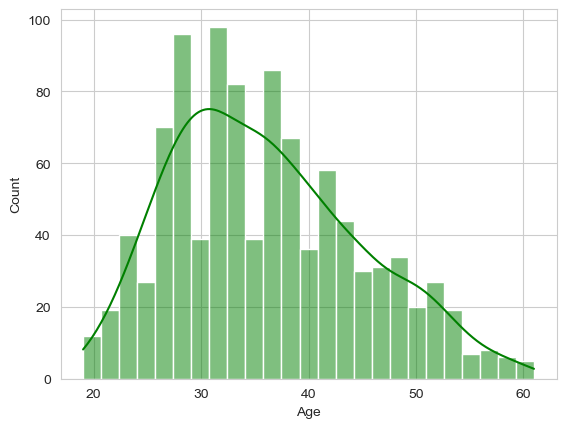

In [12]:
sns.histplot(data=ad,x='Age',bins=25,kde=True,color='green')

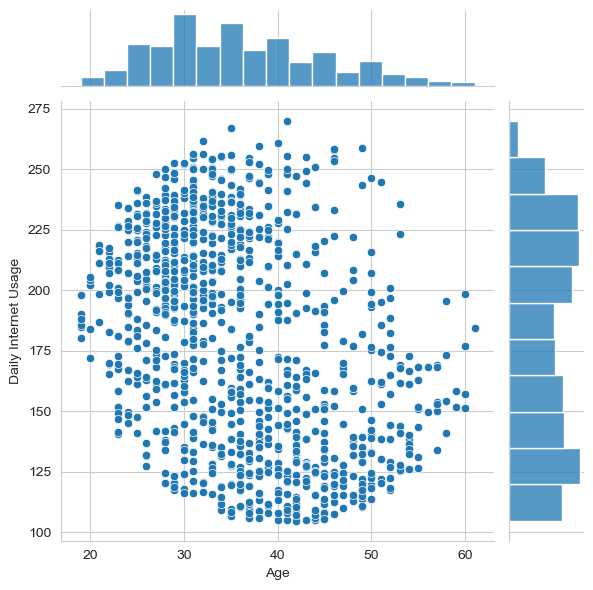

In [13]:
sns.jointplot(data=ad,x='Age',y='Daily Internet Usage')

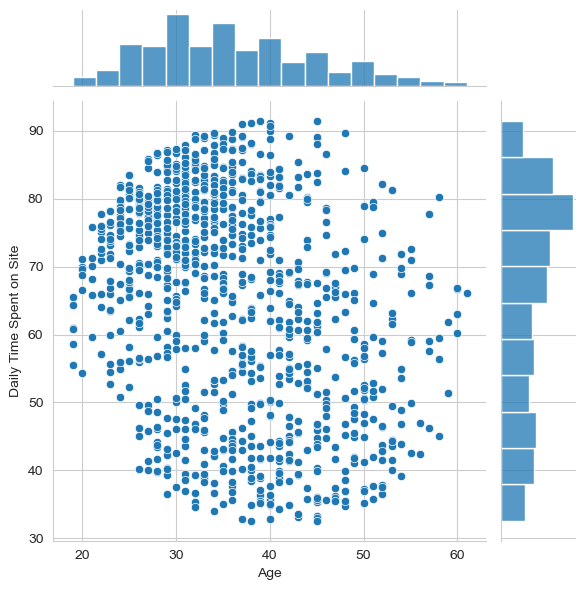

In [14]:
sns.jointplot(data=ad,x='Age',y='Daily Time Spent on Site')

**Now, since the plots show a strong concentration of points in some specific age intervals, it's a good ideia to observe the density of these points**

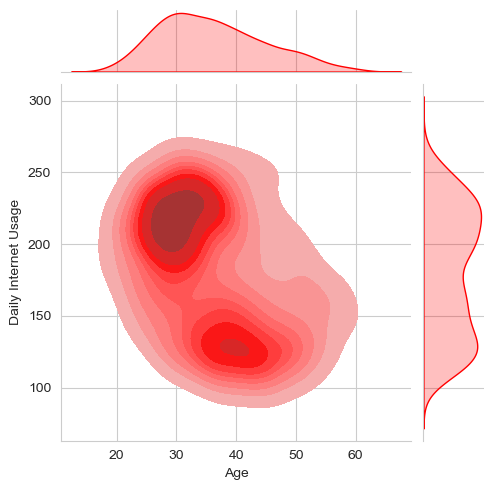

In [15]:
sns.jointplot(data=ad,x='Age',y='Daily Internet Usage',kind='kde',color='red',fill=True,height = 5)

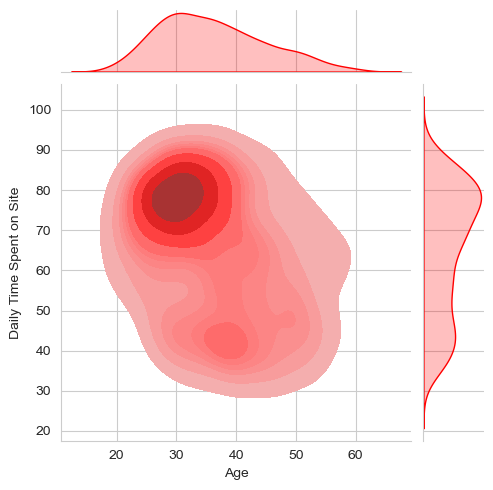

In [16]:
sns.jointplot(data=ad,x='Age',y='Daily Time Spent on Site',kind='kde',color='red',fill=True,height = 5)

**Anylising the ages and anual incomes that clicked on the advertisement the most**

<AxesSubplot:xlabel='Age', ylabel='Count'>

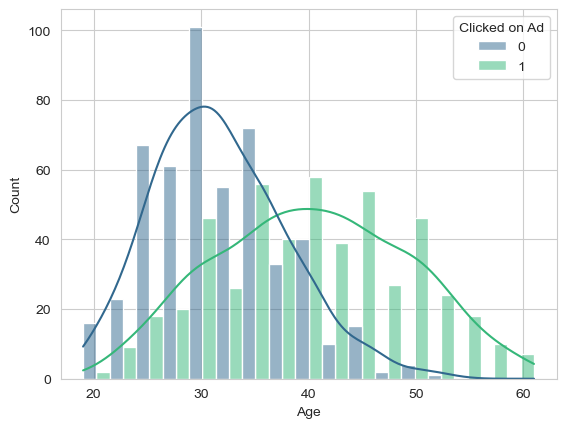

In [17]:
sns.histplot(data=ad,x='Age',hue='Clicked on Ad',multiple='dodge',kde=True,palette='viridis')

<AxesSubplot:xlabel='Area Income', ylabel='Count'>

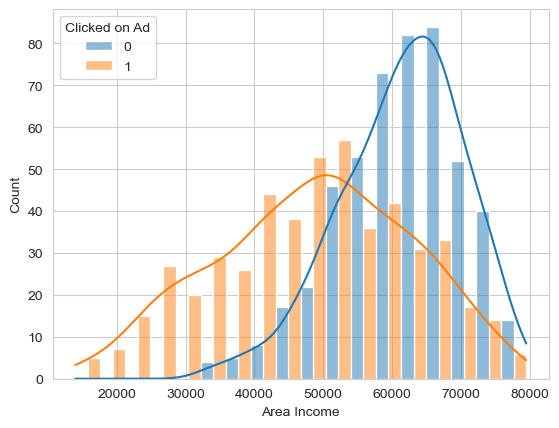

In [18]:
sns.histplot(data=ad,x='Area Income',hue='Clicked on Ad',multiple='dodge',kde=True)

**Analysing the distribution of age throughout the people who actualy clicked on the ad** 

<AxesSubplot:xlabel='Age', ylabel='Count'>

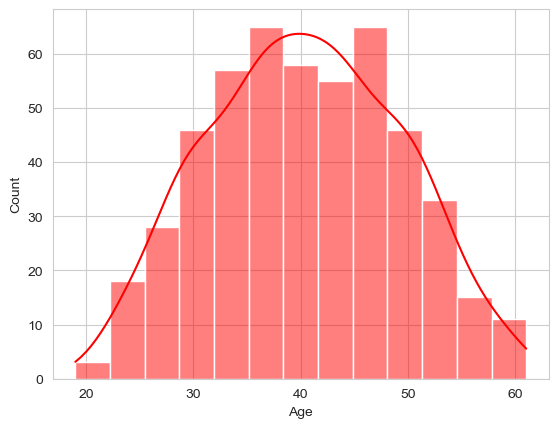

In [19]:
ad_clicked = ad[ad['Clicked on Ad'] == 1]

sns.histplot(data=ad_clicked,x='Age',kde=True,color = 'red')

# Machine Learning Algorithm: Logistic Regression

**The goal now is to utilize a statiscal model based on a Logistic Regression**

**A logistic regression is used in this case because the variable to be predicted is a categorial variable, which in this case, is wheter or not the user clicked on the ad**

**Extracting the right variables to use on the model**


In [20]:
X = ad.select_dtypes(include=['number'])

X.drop('Clicked on Ad',axis=1,inplace=True)

y = ad['Clicked on Ad']

**Splitting the Data**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**Effectively training the model**

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

**Extracting the prediction**

In [23]:
prediction = logmodel.predict(X_test)

**Getting the report of how all the model did with this specific database**

In [24]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Conclusion

**The report displayed an excellent set of results**

The model tries to predict if a user will or will not click on a given ad, thus,
it's inferable that **FALSE POSITIVES** (saying the user will click when they didn't)
are much more worrying than **FALSE NEGATIVES** (saying the user will NOT click the ad when they did) 

**Precision**: Very high precision for the model, which implies that the number of false positives is very low

**Recall**: Also very higih recall, which implies that the number of false negatives is very low

**F1-score**: Harmonic mean between Precision and Recall, represents basically a general view of the model that is more realistic than accuracy

The model did very well in all of the metrics, meaning that using a logistic regression was a very good choice for this dataset,
especially since the **PRECISION** is high, indicating the usefulness of the model in predicting correctly that the user will click the ad